# Image Classifier Project Tutorial

**Objetivo de la tarea:** Crear un algoritmo para clasificar imágenes de perros y gatos en categoría "dog" y "cat".


## Steps 1 y 2: Cargar imágenes y librerías

In [1]:
# para que funcione fit_generator
! pip install pillow
! pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 41.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 34.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 77.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [2]:
! pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 78.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 85.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 81.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 93.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 58.5 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 88.5 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 944.1/944.1 kB 25.4 MB/s eta 0:00:0000:01

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [4]:
# cargo librerías
import numpy as np
from tensorflow import keras
import keras
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
from keras.preprocessing import image
import shutil
import matplotlib.pyplot as plt
from matplotlib.image import imread

2022-08-12 21:09:48.203414: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-12 21:09:48.203461: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
# extraigo archivos zip
filename1 = "../data/train/train.zip"
filename2 = "../data/test/test1.zip"
extract_dir1 = "../data/train"
extract_dir2 = "../data/test"
archive_format = "zip"

# Unpack the archive file
shutil.unpack_archive(filename1, extract_dir1, archive_format)
shutil.unpack_archive(filename2, extract_dir2, archive_format)

## Step 3: Cargar y graficar las primeras 9 imágenes de perros y luego las primeras 9 de gatos

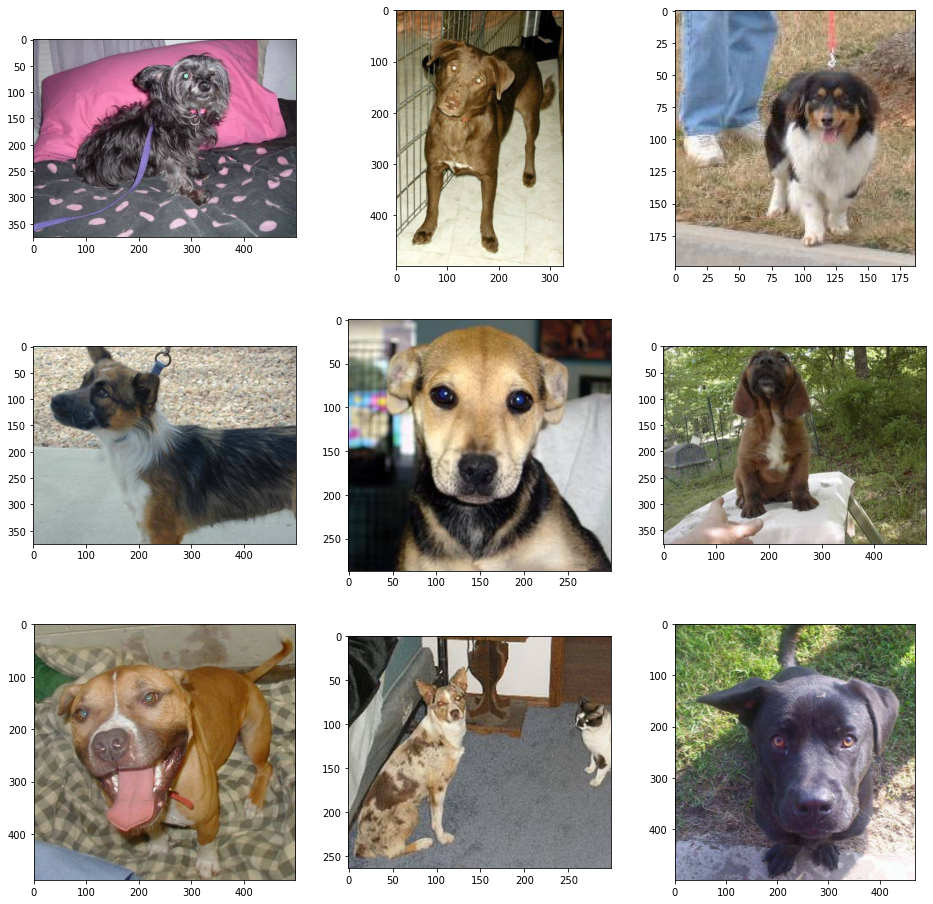

In [6]:
# Grafico las primeras 9 imágenes de perros

# define location of dataset
folder = "../data/train/train/"
fig, ax = plt.subplots(3, 3, figsize = (16, 16))
ax = ax.flatten()
for i in range(len(ax)):
    # define filename
    filename = folder + 'dog.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    ax[i].imshow(image)
    # show the figure
plt.show()

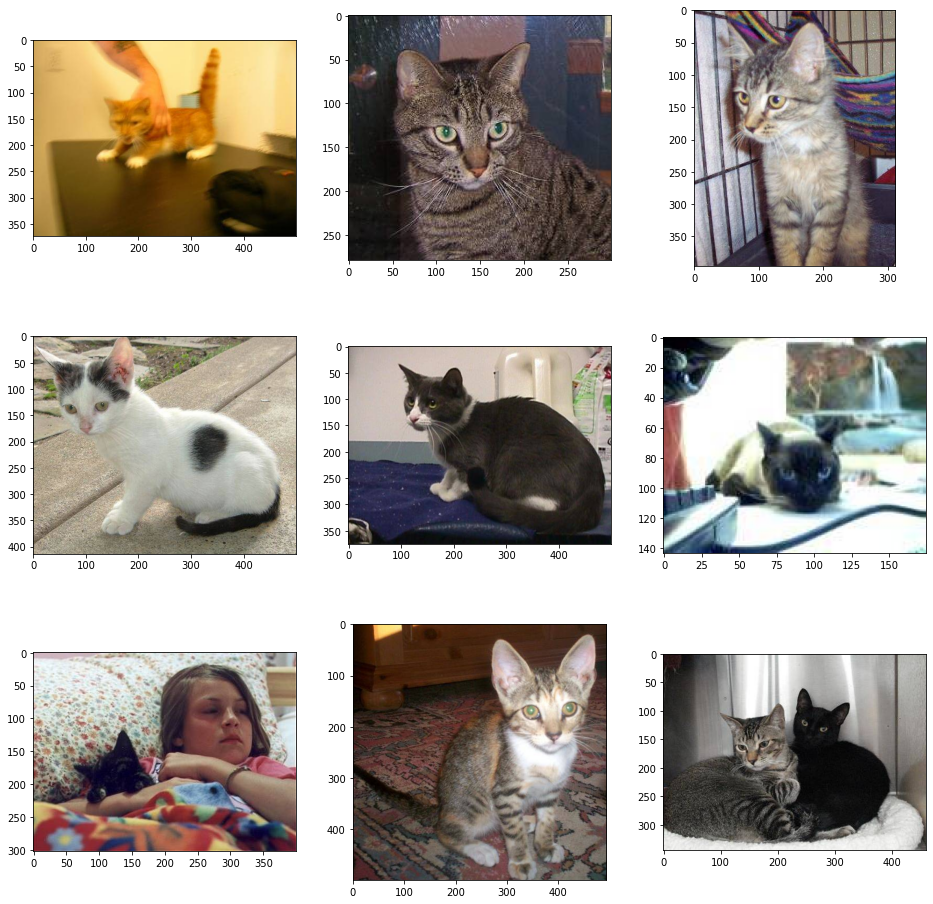

In [7]:
# Grafico las primeras 9 imágenes de gatos

# define location of dataset
folder = "../data/train/train/"
fig, ax = plt.subplots(3, 3, figsize = (16, 16))
ax = ax.flatten()
for i in range(len(ax)):
    # define filename
    filename = folder + 'cat.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    ax[i].imshow(image)
    # show the figure
plt.show()

## Step 4: Cargar los objetos de tipo ImageDataGenerator

* primero reubico las imágenes de train en las subcarpetas cat y dog (desde terminal):

`mv data/train/train/cat*.jpg data/train/train/cat`

`mv data/train/train/dog*.jpg data/train/train/dog`

In [27]:
! pip install split-folders
import splitfolders # or import splitfolders


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


después divido imágenes de train en train y test (dentro de train_split), usando librería split-folders

In [31]:
input_folder = "../data/train/train"
output = "../data/train/train_split"
splitfolders.ratio(input_folder, output = output, seed=908, ratio=(.75, 0, .25)) # 75% train, 0% val, 25% test

Elimino desde terminal archivos que ya no necesito:

`rm data/test/test1.zip`

`rm data/train/train`

`rm -r data/train/train`


In [5]:
# se cargan los datos para el modelo, cambiándoles el tamaño
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory = "../data/train/train_split/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="../data/train/train_split/test", target_size=(224,224))

Found 18750 images belonging to 2 classes.
Found 6250 images belonging to 2 classes.


## Step 5: Crear el modelo

In [6]:
# de define el modelo
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

2022-08-12 21:10:15.841219: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-12 21:10:15.841280: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-12 21:10:15.841314: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (rominagonel-imageclassi-tye8ccoz8ht): /proc/driver/nvidia/version does not exist
2022-08-12 21:10:15.841703: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Step 6: Pasar los datos a capa densa

In [7]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu")) # Cristian sugirió 128
model.add(Dense(units=4096,activation="relu")) # Cristian sugirió 32
model.add(Dense(units=2, activation="softmax"))

## Step 7: Importar y usar optimizador Adam

In [8]:
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## Step 8: Chequear el resumen del modelo

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

## Step 9: Importar los métodos ModelCheckpoint y EarlyStopping de keras. Crear un objeto de ambos y pasarlo como funciones de devolución de llamada a fit_generator

In [11]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

Primero probé con epoch = 10 y llegó hasta el 4 y se cortó.,  el accuracy no mejoraba en cada epoch.

Después probé con epoch = 1 para ver como es la salida de la función.

In [12]:
# pruebo con epoch = 1 y después paso a epoch = 10
hist = model.fit_generator(generator=traindata, validation_data= testdata,epochs=1, steps_per_epoch = 100, callbacks=[checkpoint,early])
#hist = model.fit_generator(steps_per_epoch=100,train_generator=traindata, validation_data= testdata, validation_steps=10,epochs=100,callbacks=[checkpoint,early])


/tmp/ipykernel_2230/1712652916.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator=traindata, validation_data= testdata,epochs=1, steps_per_epoch = 100, callbacks=[checkpoint,early])


100/100 [==============================] - 2570s 26s/step - loss: 323.2072 - accuracy: 0.4878 - val_loss: 0.6932 - val_accuracy: 0.5000


Con epoch = 1 demoró 43 min en salir el resultado, no veo que se haya guardado el modelo

In [13]:
# se guarda el modelo (no sé si es necesario)
model.save('../models/vgg16_1.h5')

## Step 10: Visualizar train/validation accuracy y loss

In [19]:
print(hist.history)

{'loss': [323.20721435546875], 'accuracy': [0.4878048896789551], 'val_loss': [0.6932029724121094], 'val_accuracy': [0.5]}


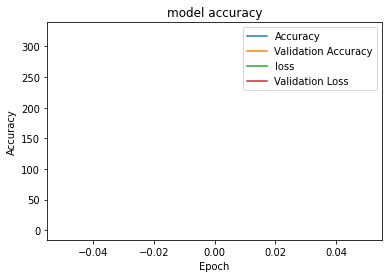

In [20]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

## Step 11: Cargar el mejor modelo y preprocesar las imágenes, usarlo para hacer predicciones

1/1 [==============================] - 0s 397ms/step
dog


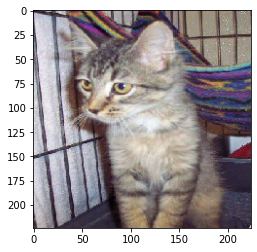

In [23]:
# predigo para primera imagen de gatos en test
img = keras.utils.load_img("../data/train/train_split/test/cat/cat.2.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("../models/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')

El modelo se equivoca. Lo clasifica como perro

1/1 [==============================] - 1s 560ms/step
dog


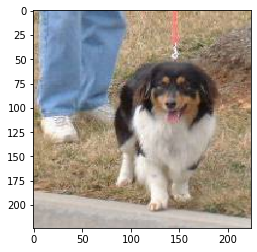

In [24]:
# predigo para primera imagen de perros en test
img = keras.utils.load_img("../data/train/train_split/test/dog/dog.2.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("../models/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')

El modelo acierta. Lo clasifica como perro